<h1 style=' text-align:center; color: blueviolet ' > Youtube & Spotify </h1>

En este trabajo práctico se tiene un data set con canciones de varios artistas mundiales en las plataformas de 
Spotify y Youtube. 

La idea del trabajo es, tener una visualización del Top 10 en Views, Top 10 en Likes. <br>


*Fuente: https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube*

*datos actualizados al 07/02/2023.*


---

Anthony de los Santos. 

In [2]:
# Import de paquetes

import pandas as pd;

import matplotlib.pyplot as plt;
plt.style.use('seaborn')

In [28]:
# Import del data set. 

dataSet = pd.read_csv('Spotify_Youtube.csv');
dataSet.head(3)  # muestra de las 3 primeras entradas ( filas, observaciones del dataset )

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07


- Que interesa saber del data set ? 

1. Canciones con mas views en ambas plataformas.
2. Hay relación entre views y likes ?
3. Top 10 de canciones mas vistas y Top 10 con mas likes. 

In [4]:
#Dimension del data set 
dataSet.shape

(20718, 28)

In [5]:
# filtro de las variables views y likes 
d_views, d_likes = dataSet['Views'].dropna(),dataSet['Likes'].dropna()

# dimensiones de Views y Likes respectivamente, sin NA. 
d_views.shape, d_likes.shape



((20248,), (20177,))

In [6]:
 d_views.max() # Maximo de views ... 

8079649362.0

In [7]:
dataSet.loc[ dataSet["Views"]  == d_views.max()]

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1147,1147,Luis Fonsi,https://open.spotify.com/artist/4V8Sr092TqfHkf...,Despacito,VIDA,album,spotify:track:6habFhsOp2NvshLv26DqMb,0.655,0.797,2.0,...,https://www.youtube.com/watch?v=kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,True,1.506598e+09


In [8]:
d_likes.max() # Maximo de likes ...

50788652.0

In [9]:
dataSet.loc[ dataSet["Likes"]  == d_likes.max()]
 
    

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
1147,1147,Luis Fonsi,https://open.spotify.com/artist/4V8Sr092TqfHkf...,Despacito,VIDA,album,spotify:track:6habFhsOp2NvshLv26DqMb,0.655,0.797,2.0,...,https://www.youtube.com/watch?v=kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,True,1.506598e+09


- Tanto en Likes como en Views, se tiene a *Luis Fonsi - Despacito* en primer lugar. 
- Se subio el video en Youtube el 13 de enero de 2017 

In [10]:
# Armado de lista con los 10 mas vistos

v = list( d_views ); v.sort()
v_10 = v[len(v)-10:]

In [11]:
v10 = dataSet.loc[ dataSet["Views"] >= v_10[0]  ] # Los 10 mas vistos... 
v10.head(4)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
365,365,Daddy Yankee,https://open.spotify.com/artist/4VMYDCV2IEDYJA...,Despacito,VIDA,album,spotify:track:6habFhsOp2NvshLv26DqMb,0.655,0.797,2.0,...,https://www.youtube.com/watch?v=kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079647e+09,50788626.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,True,1.506598e+09
1147,1147,Luis Fonsi,https://open.spotify.com/artist/4V8Sr092TqfHkf...,Despacito,VIDA,album,spotify:track:6habFhsOp2NvshLv26DqMb,0.655,0.797,2.0,...,https://www.youtube.com/watch?v=kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,True,1.506598e+09
8937,8937,PSY,https://open.spotify.com/artist/2dd5mrQZvg6Sma...,Gangnam Style (강남스타일),Gangnam Style (강남스타일),single,spotify:track:03UrZgTINDqvnUMbbIMhql,0.727,0.937,11.0,...,https://www.youtube.com/watch?v=9bZkp7q19f0,PSY - GANGNAM STYLE(강남스타일) M/V,officialpsy,4.679767e+09,26399133.0,5331537.0,PSY - ‘I LUV IT’ M/V @ https://youtu.be/Xvjnoa...,False,False,3.709911e+08
9569,9569,Maroon 5,https://open.spotify.com/artist/04gDigrS5kc9YW...,Sugar,V,album,spotify:track:2iuZJX9X9P0GKaE93xcPjk,0.748,0.788,1.0,...,https://www.youtube.com/watch?v=09R8_2nJtjg,Maroon 5 - Sugar (Official Music Video),Maroon5VEVO,3.817733e+09,15340646.0,415496.0,Buy Sugar on iTunes: http://smarturl.it/M5V\n\...,True,True,1.502781e+09


In [12]:
# Armado de lista con los 10 con mayor cantidad de likes. 
l = list( d_likes ); l.sort()
l_10 = l[len(l)-10:]


In [13]:
l10 = dataSet.loc[ dataSet["Likes"] >= l_10[0]  ] # Los 10 mas vistos... 
l10.head(4) 

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
365,365,Daddy Yankee,https://open.spotify.com/artist/4VMYDCV2IEDYJA...,Despacito,VIDA,album,spotify:track:6habFhsOp2NvshLv26DqMb,0.655,0.797,2.0,...,https://www.youtube.com/watch?v=kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079647e+09,50788626.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,True,1.506598e+09
1147,1147,Luis Fonsi,https://open.spotify.com/artist/4V8Sr092TqfHkf...,Despacito,VIDA,album,spotify:track:6habFhsOp2NvshLv26DqMb,0.655,0.797,2.0,...,https://www.youtube.com/watch?v=kJQP7kiw5Fk,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,True,1.506598e+09
8937,8937,PSY,https://open.spotify.com/artist/2dd5mrQZvg6Sma...,Gangnam Style (강남스타일),Gangnam Style (강남스타일),single,spotify:track:03UrZgTINDqvnUMbbIMhql,0.727,0.937,11.0,...,https://www.youtube.com/watch?v=9bZkp7q19f0,PSY - GANGNAM STYLE(강남스타일) M/V,officialpsy,4.679767e+09,26399133.0,5331537.0,PSY - ‘I LUV IT’ M/V @ https://youtu.be/Xvjnoa...,False,False,3.709911e+08
12452,12452,Ed Sheeran,https://open.spotify.com/artist/6eUKZXaKkcviH0...,Shape of You,÷ (Deluxe),album,spotify:track:7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1.0,...,https://www.youtube.com/watch?v=JGwWNGJdvx8,Ed Sheeran - Shape of You (Official Music Video),Ed Sheeran,5.908398e+09,31047780.0,1130327.0,The official music video for Ed Sheeran - Shap...,True,True,3.362005e+09


In [14]:
# --- 
# Plot de Views & Likes. 
#

<AxesSubplot:title={'center':'Views & Likes (Escala log)'}, xlabel='Artist'>

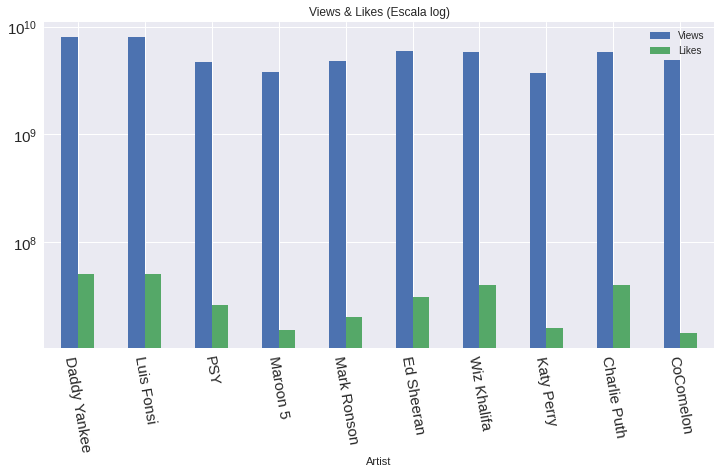

In [18]:
v10.plot( 'Artist', ['Views','Likes'], 
         'bar' , logy=True,
         title='Views & Likes (Escala log)',
         figsize=(12,6), rot=-80,
         fontsize=15 ) 

 

In [ ]:
# ... 